# Project 2 - STA 4163 
## Categorical Data Analysis and Regression Analysis

**Name:** Xavier Andres Soto Baron
**UCF ID:** 5601517

---

### Question 1 — 30 pts

n 2020, the vaccine for the COVID-19 virus was being developed, and the
CDC wanted to ensure that the vaccines were effective at reducing the risk for infection,
hospitalization, and death from the virus. The CDC pooled many studies together to evaluate the
strength of the evidence (this is called meta-analysis). A link to this summary is shown here:
(https://www.cdc.gov/vaccines/acip/recs/grade/covid-19-pfizer-biontech-vaccine.html)


A summary of their results is shown below (note that this is just the pooled data from
randomized studies). The two variables of interest are the treatment (vaccine or placebo) and
whether or not a study member got infected by COVID.

| Treatment | Infection | No Infection | Total |
|----------|-----------|--------------|-------|
| Vaccine | 77 | 19,634 | 19,711 |
| Placebo | 833 | 18,908 | 19,741 |
| **Total** | 910 | 38,542 | 39,452 |

**[5 pts] Question 1(a)**  
Are the assumptions of a chi-squared test valid? Explain why or why not.

**Answer:**

To use a chi-squared test for independence, we check:

1. All Expected Frequencies are greater or equal to 1
   
2. No more than 20% of expected frequencies are less than 5

- Vaccine, Infection: $77$
- Vaccine, No Infection: $19,634$
- Vaccine row total: $19,711$

- Placebo, Infection: $833$
- Placebo, No Infection: $18,908$
- Placebo row total: $19,741$

- Column totals: Infection $= 910$, No Infection $= 38,542$
- Table total: $39,452$

The expected frequency formula from the Unit 4 notes is:

$$
E = \frac{(\text{row total})(\text{column total})}{\text{table total}}
$$



#### 1. Expected count for Vaccine & Infection

$$
E_{V,I} = \frac{19,711 \times 910}{39,452}
$$

$$
E_{V,I} \approx 454.65
$$



#### 2. Expected count for Vaccine & No Infection

$$
E_{V,NI} = \frac{19,711 \times 38,542}{39,452}
$$

$$
E_{V,NI} \approx 19,256.35
$$


#### 3. Expected count for Placebo & Infection

$$
E_{P,I} = \frac{19,741 \times 910}{39,452}
$$

$$
E_{P,I} \approx 455.35
$$


#### 4. Expected count for Placebo & No Infection

$$
E_{P,NI} = \frac{19,741 \times 38,542}{39,452}
$$

$$
E_{P,NI} \approx 19,285.65
$$



#### Final Expected Counts (Math Only)

- Vaccine, Infection: $454.65$
- Vaccine, No Infection: $19,256.35$

- Placebo, Infection: $455.35$
- Placebo, No Infection: $19,285.65$


### Chi-Square Assumption Check

1. All expected frequencies $\ge 1$  
   - Smallest expected = $454.65$ →  Satisfied.

2. No more than $20\%$ of expected frequencies $< 5$  
   - $0\%$ are below $5$ →  Satisfied.

In [22]:
#Chi Square Test for Independence part b

#We will use a matrix to represent the data.
covid <- matrix(c(77, 19634,
                  833, 18908),
                nrow = 2, byrow = TRUE)

print(covid)

#Use the dataset for a chisq test for independence
results <- chisq.test(covid, correct = F)
print(results)

#Print the expected frequencies of the test
print(results$expected)

     [,1]  [,2]
[1,]   77 19634
[2,]  833 18908

	Pearson's Chi-squared test

data:  covid
X-squared = 641.71, df = 1, p-value < 2.2e-16

        [,1]     [,2]
[1,] 454.654 19256.35
[2,] 455.346 19285.65



**[25 pts] Question 1(b)** 
Conduct a chi-square test for independence to determine if infection status and treatment are dependent.

**Answer:**

#### Step 1: State the hypotheses 

- $H_0$: There is **no association** between treatment and infection status.  
  The proportion infected is the **same** for the vaccine group and the placebo group.

- $H_a$: There **is an association** between treatment and infection status.  
 The proportion infected is **different** between the vaccine group and the placebo group.


#### Step 2: Choose significance level  
$\alpha = 0.05$


#### Step 3: Compute the test statistic  

R output:


	Pearson's Chi-squared test

data:  covid
X-squared = 641.71, df = 1, p-value < 2.2e-16 

So the test statistic is:

$$
\chi^2_0 = 641.71
$$

with

$$
df = (r - 1)(c - 1) = (2 - 1)(2 - 1) = 1.
$$

#### Step 4: Rejection region or p-value

The p-value is:

$$
p < 2.2 \times 10^{-16}
$$

Since $p < \alpha = 0.05$, we reject $H_0$.

#### Step 5: Conclusion

We reject the null hypothesis $H_0$. At the significance level $\alpha = 0.05$, the data provide strong evidence that treatment group (vaccine vs placebo) **and** infection status are **dependent**.

In other words, infection status is not the same across the two treatment groups; the vaccine group shows a much lower infection rate than the placebo group.

---

### Question 2 — 70 pts

Banks often use credit scores to determine if to offer someone a loan or
mortgage. Suppose that a bank wants to predict the credit score of a person using other metrics.
In a random sample of 200 credit card applicants, they recorded 4 variables:
- Credit Score (points)
- Income ($1,000s)
- Age (years)
- Education (numbers of years)

Dataset: **STA4163 Project 2 Dataset**

### Part I — Simple Linear Regression (Income → Credit Score) — 50 pts

First, they want to see how well income can perform as a sole predictor of credit score using
simple linear regression

**[2 pts] 1. Identify the independent and dependent variable.**

**Answer:**

Independent Variable: Income (1,000 thousand dollarss) $\to$ X var

Dependent Variable : Credit Score (points) $\to$ Y var.



In [23]:
#Required libraries for reading excel files in Jupyter Notebook
#Only required to run once
#going to keep for submission
install.packages("readxl")   
library(readxl)

#Read the file
data <- read_excel("STA4163 Project 2 Dataset.xlsx")
head(data)

attach(data)

# Keep only the columns Income and Credit Score for Simple Linear Regression
simple_linear_data <- data[, c("Income", "Rating")]

attach(simple_linear_data)

# Display the new dataset
head(simple_linear_data)



Warning message:
"package 'readxl' is in use and will not be installed"


Income,Rating,Age,Education
<dbl>,<dbl>,<dbl>,<dbl>
14.891,283,34,11
106.025,483,82,15
104.593,514,71,11
148.924,681,36,11
55.882,357,68,16
80.180,569,77,10


The following objects are masked from simple_linear_data:

    Income, Rating


The following objects are masked from data (pos = 4):

    Age, Education, Income, Rating


The following objects are masked from data (pos = 3):

    Income, Rating


The following objects are masked from simple_linear_data (pos = 4):

    Income, Rating


The following objects are masked from data (pos = 5):

    Income, Rating




Income,Rating
<dbl>,<dbl>
14.891,283
106.025,483
104.593,514
148.924,681
55.882,357
80.180,569


**[4 pts] 2. Create a scatterplot for this data. Describe the relationship between income and credit score.**


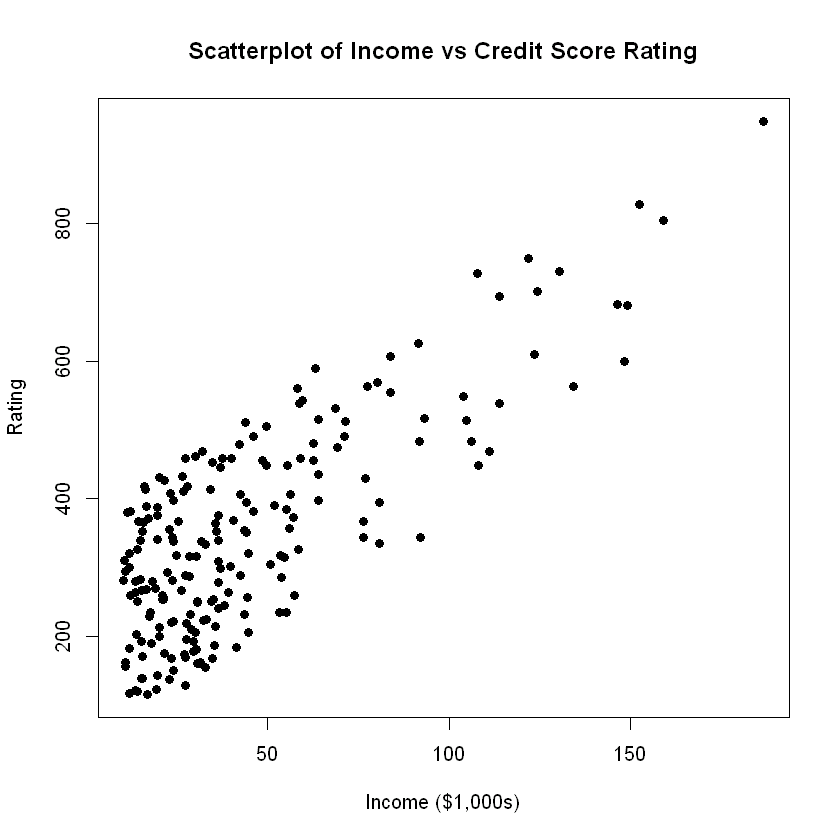

In [24]:
#Scatterplot Income vs Credit Score Rating
plot(Income,Rating,
     main = "Scatterplot of Income vs Credit Score Rating",
     xlab = "Income ($1,000s)",
     ylab = "Rating",
     pch = 16)

The scatterplot shows a positive linear relationship between income and credit score rating. As income increases, credit score rating tends to increase as well. The points form an upward trend, indicating that individuals with higher incomes generally have higher credit score ratings. The relationship appears moderately to strongly linear, with some natural variability but a clear overall upward pattern.

**[2 pts] 3. State the least-squares estimate of the regression line. Write the model using proper notation.**


In [25]:
#Build the regression model
model <- lm(Rating ~ Income, data = simple_linear_data)

# Prints model
summary(model)


Call:
lm(formula = Rating ~ Income, data = simple_linear_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-176.933  -78.003   -3.599   80.758  171.290 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 193.2599    11.1083   17.40   <2e-16 ***
Income        3.5573     0.1982   17.95   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 95.34 on 198 degrees of freedom
Multiple R-squared:  0.6194,	Adjusted R-squared:  0.6175 
F-statistic: 322.3 on 1 and 198 DF,  p-value: < 2.2e-16


The simple linear regression model for predicting credit score rating from income is:

$$\hat{y} = b_0 + b_1 x$$

From the R output:

- Intercept: $b_0 = 193.2599$
- Slope: $b_1 = 3.5573$

Therefore, the least-squares regression line is:

$$\text{Rating} = 193.2599 + 3.5573(\text{Income})$$

where Income is measured in thousands of dollars.


**[4 pts] 4. Give practical interpretations of the y-intercept and slope.**

**Interpretation of the y-intercept ($b_0 = 193.2599$):**  
The y-intercept represents the predicted credit score rating for a person with an income of $0$ (in 1,000 thousand dollars).  
In practice, an income of $0$ is not realistic for credit applicants, so the intercept mainly serves as a mathematical anchor for the regression line rather than a meaningful real-world prediction.

**Interpretation of the slope ($b_1 = 3.5573$):**  
The slope indicates that for every increase of $1$ unit in income (which equals $1{,}000$ dollars), the predicted credit score rating increases by approximately $3.56$ points.  
This means that higher income is associated with higher credit score ratings.

**[2 pts] 5. Find the estimate of the standard error of the estimate.**

The estimate of the standard error of the estimate is the **residual standard error** from the regression output.

From the model summary:

$$\text{Standard error of the estimate} = 95.34$$


**[6 pts] 6. Conduct a hypothesis test at α = 0.05 to determine whether there is a significant linear relationship between income and credit score.**

**Answer:**

##### **Step 1: State the hypotheses**

Two-tailed test:

- $H_0 : \beta_1 = 0$  
  (There is **no linear relationship** between income and credit score rating.)

- $H_a : \beta_1 \ne 0$  
  (There **is** a linear relationship between income and credit score rating.)



##### **Step 2: Select significance level**

$\alpha = 0.05$


##### **Step 3: Compute the test statistic**

From the regression output:

- Slope estimate: $b_1 = 3.5573$  
- Standard error: $SE_{b_1} = 0.1982$

Test statistic:

$$
t_0 = \frac{b_1 - 0}{SE_{b_1}} = \frac{3.5573}{0.1982} = 17.95
$$

Degrees of freedom:

$$
df = n - 2 = 200 - 2 = 198
$$



##### **Step 4: Find the p-value**

From R output:

Since:

$$
p < 0.0000000000000002 < \alpha
$$

we reject the null hypothesis.

##### **Step 5: Conclusion**

At the $\alpha = 0.05$ significance level, we reject $H_0$.  
There is **strong statistical evidence** of a significant linear relationship between income and credit score rating.

Higher income is associated with higher predicted credit score ratings.

---

**[4 pts] 7. Construct a 95% confidence interval for the slope. Interpret the interval.**


In [26]:
#95% Confidence level interval
confint(model, level = 0.95)

,2.5 %,97.5 %
(Intercept),171.354193,215.165557
Income,3.166568,3.948098


**Interpretation:**

We are 95% confident that the true increase in credit score rating for every additional $1,000 in income is between 3.166 points and 3.949 points.

**[3 pts] 8. Find and interpret the coefficient of correlation.**

In [27]:
#Coefficient of Correlation
cor(Income, Rating)

[1] 0.7870445

**Answer:**

From R Output:

Coefficient of Correlation is **0.787**.

- The value $r = 0.7870$ indicates a **strong positive linear relationship** between income and credit score rating.  
- As income increases, credit score rating tends to increase as well.


**[3 pts] 9. Find and interpret the coefficient of determination (r²).**


From the regression output:

$$
R^2 = 0.6194
$$

**Interpretation (following professor’s style):**

- $61.94\%$ of the variation in credit score rating is explained by income.  
- The remaining $38.06\%$ of the variation is explained by other factors not included in the model (other predictors, individual differences, measurement error, etc.).




**[10 pts] Analyze the appropriate plots to check the assumptions of the errors. Make sure
to:**

**a.** State all the assumptions.

To use simple linear regression, we make assumptions:

1. **Linearity Assumption**  
   The relationship between the mean of Rating (Y) and Income (X) is linear.

2. **Constant Variance Assumption**  
   The errors have the same variance for all values of X.

3. **Normality Assumption**  
   The residuals are normally distributed.

4. **Independence Assumption**  
   Each observation’s error is independent of the others.

**b.** Show all your plots and describe which assumption you are analyzing, and how
the plot shows that assumption is or isn’t violated. Note that there may not be a
plot needed for each assumption


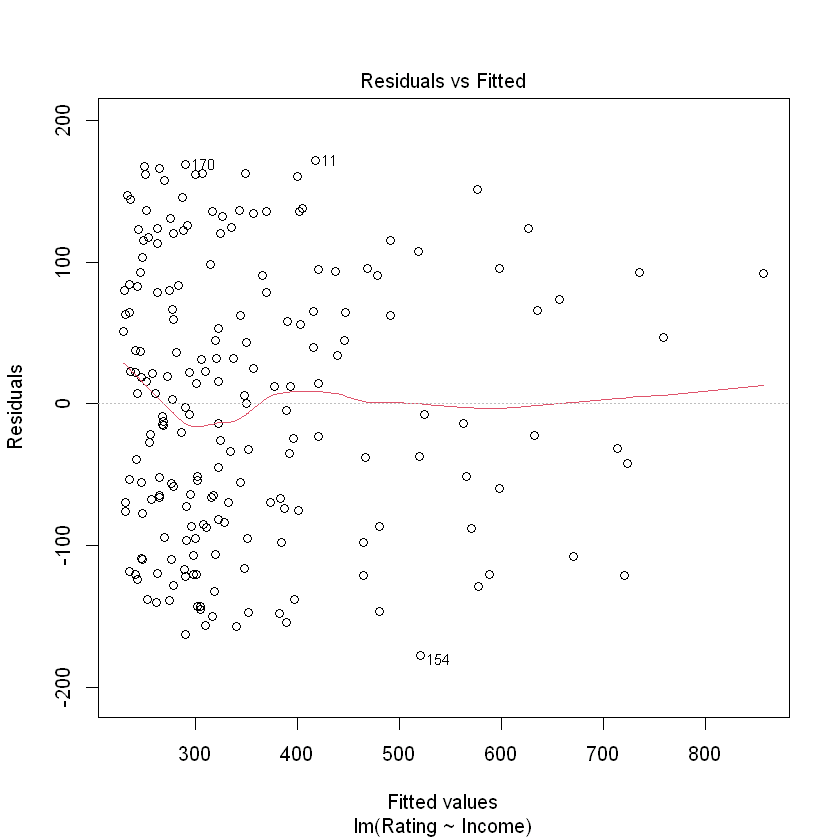

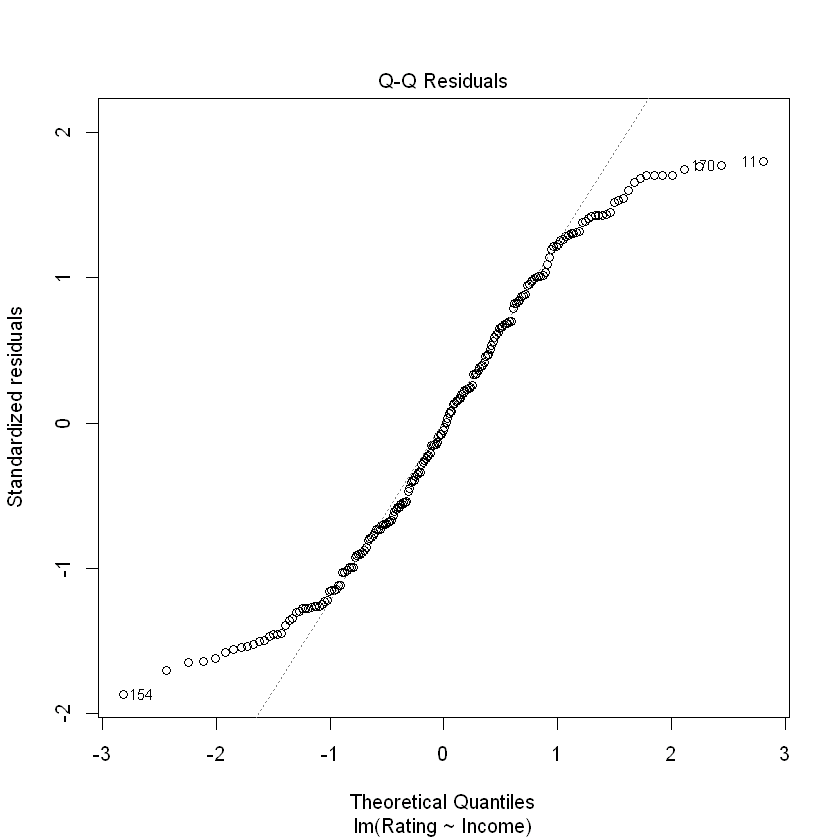

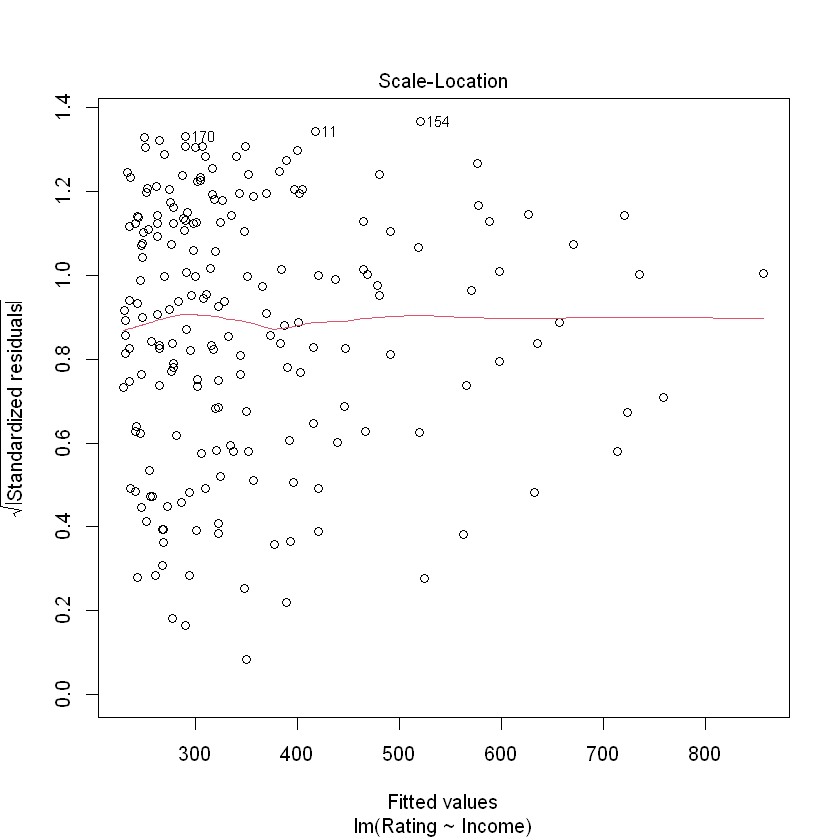

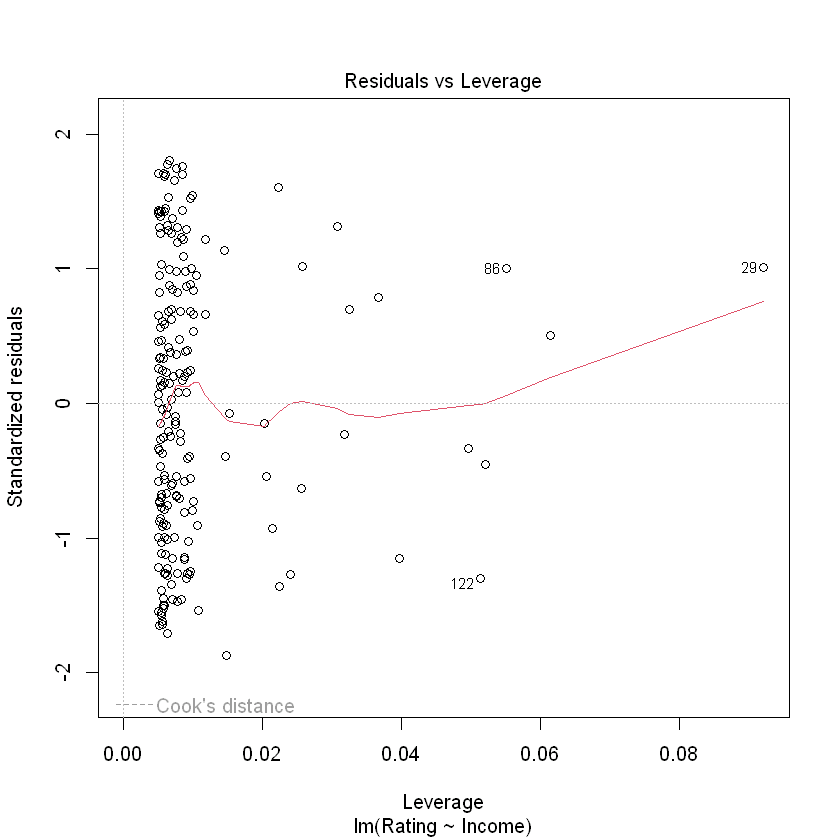

In [28]:

plot(model)


**Answer:**

Residuals vs Fitted Plot — Linearity and Constant Variance

**Assumptions checked:**
- Linearity
- Constant variance 

**Interpretation:**  
The residuals appear randomly scattered around the horizontal zero line with no clear curved pattern. This indicates that the **linearity assumption is satisfied**.  
The vertical spread of points remains mostly consistent across all fitted values, with only slight widening at higher fitted values. Because there is no strong “cone shape,” the **constant variance assumption is reasonably met**.


2. Normal Q–Q Plot — Normality of Errors

**Assumption checked:**
- Normality

**Interpretation:**  
The residuals follow the diagonal reference line closely, with only small deviations at the ends. This indicates the residuals are approximately normal.  
Therefore, the **normality assumption is satisfied**.

- For **Independence Assumption** We merely State. We **Assume** we have a sample where each observation is independent from one another. 


#### Summary

- **Linearity:** Satisfied  
- **Constant variance:** Satisfied (minor deviation acceptable)  
- **Normality:** Satisfied  
- **Independence:** Satisfied


Overall, the diagnostic plots support that all regression assumptions are reasonably met.


**[4 pts] 11. Overall, is the model appropriate to use? State why or why not.**

**Answer:**

**Yes**, the model is appropriate to use.

All regression assumptions were reasonably satisfied:

- The **Residuals vs Fitted** plot showed a random scatter with no curved pattern, so the **linearity assumption is satisfied**.
- The residuals displayed a mostly consistent spread, meaning the **constant variance assumption is reasonably met**.
- The **Normal Q–Q** plot showed points close to the reference line, so the **normality assumption is satisfied**.
- **Independence assumption is satisfied**, we must assume this and state it.

Since all assumptions hold and no influential outliers were detected, the simple linear regression model is appropriate for analyzing the relationship between Income and Rating.


**[6 pts] Regardless of your previous answer, find the predicted credit score for someone
who makes $56,000 a year (be careful with the units)**. 

Additionally, find and interpret a
confidence interval for the mean credit score for all people who make $56,000$ Dollars a year and
a prediction interval for the predicted credit score for a single person who makes $56,000$ Dollars
a year.





In [29]:
#Confidence Interval
predict(model, newdata = data.frame(Income = 56),
        interval = "confidence", level = 0.95)

#Prediction Interval
predict(model, newdata = data.frame(Income = 56),
        interval = "prediction", level = 0.95)

,fit,lwr,upr
1,392.4705,378.4432,406.4979


,fit,lwr,upr
1,392.4705,203.9275,581.0136


Income in the dataset is measured in **thousands of dollars**, so:

$ x = 56 $

Using the fitted regression model:

$ \hat{y} = 193.2599 + 3.5573(56) $

$ \hat{y} = 193.2599 + 199.2088 = 392.4687 $

**Predicted credit score at \$56,000:**  
$ \hat{y} = 392.4687 $



### 95% Confidence Interval for the Mean Credit Score (Income = 56)

From the R output:

- fit = $392.4705$  
- lower bound = $378.4432$  
- upper bound = $406.4979$

The 95% confidence interval is:

$ (378.4432,406.4979) $

**Interpretation:**  
We are 95% confident that the **mean credit score** of all individuals earning $56,000 lies within this interval.


### 95% Prediction Interval for a Single Person (Income = 56)

From the R output:

- fit = $392.4705$  
- lower bound = $203.9275$  
- upper bound = $581.0136$

The 95% prediction interval is:

$ (203.9275, 581.0136) $

**Interpretation:**  
We are 95% confident that the **credit score of an individual person** who earns $56,000 will fall within this interval.  

---



### Part II — Multiple Linear Regression — 20 pts  
*(Income, Age, Education → Credit Score)*

**[4 pts] 1. Fit a multiple linear regression model. Write the estimated regression equation.**


In [30]:
#For Part II - Multiple Linear Regression
# Import the full dataset from the Excel file
df<- read_excel("STA4163 Project 2 Dataset.xlsx")

# View the first few rows
head(df)

# Build the multiple regression model
model <- lm(Rating ~ Income + Age + Education, data = df)

# View the results
summary(model)

Income,Rating,Age,Education
<dbl>,<dbl>,<dbl>,<dbl>
14.891,283,34,11
106.025,483,82,15
104.593,514,71,11
148.924,681,36,11
55.882,357,68,16
80.180,569,77,10



Call:
lm(formula = Rating ~ Income + Age + Education, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-177.021  -75.313    1.108   76.809  168.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 247.4118    38.6627   6.399 1.13e-09 ***
Income        3.5768     0.1988  17.992  < 2e-16 ***
Age          -0.3550     0.3865  -0.918    0.359    
Education    -2.6173     2.2649  -1.156    0.249    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 95.31 on 196 degrees of freedom
Multiple R-squared:  0.6236,	Adjusted R-squared:  0.6178 
F-statistic: 108.2 on 3 and 196 DF,  p-value: < 2.2e-16


**Answer:**

Using the model: Rating ~ Income + Age + Education

The estimated coefficients from the R output are:

Intercept: $247.4118$

Income: $3.5768$

Age: $-0.3550$

Education: $-2.6173$

Estimated Regression Equation:

$ Rating = 247.4118 + 3.5768(\text{Income}) - 0.3550(\text{Age}) - 2.6173(\text{Education}) $


**[6 pts] 2. Find and interpret r² and adjusted r².**

**Answer:**

From R Output:
Multiple R-squared:  0.6236,	Adjusted R-squared:  0.6178 

**r²:** 0.6236 and **adjusted r²:** 0.6178

**Interpretation:**

- $R^2 = 0.6236$ means that 62.36% of the variation in credit score rating is explained by Income, Age, and Education.

- Adjusted $R^2 = 0.6178$ accounts for model size and sample size. After correcting for these, 61.78% of the variability in Rating is still explained.

- Both values are relatively high, indicating a good model fit.


**[6 pts] 3. Conduct the overall F-test. Interpret the results.**

**Answer:**

### Step 1: State the hypotheses

$H_0: \beta_1 = \beta_2 = \beta_3 = 0$  
None of the predictors (Income, Age, Education) are linearly associated with Rating.

$H_a:$ At least one $\beta_j \ne 0$  
At least one predictor is significantly associated with Rating.


### Step 2: Select a significance level

$\alpha = 0.05$


### Step 3: Compute the test statistic

From the R output:

- F-statistic: $108.2$  
- Degrees of freedom: $df_1 = 3$, $df_2 = 196$

$F_0 = 108.2$


### Step 4: Find the p-value and compare to α

p-value (from output):

$ p = 2.2 \times 10^{-16} $

Since:

$ p < \alpha $

we reject $H_0$.


### Step 5: Conclusion

Since the p-value $< \alpha = 0.05$, we **reject $H_0$**.There is strong evidence that **at least one predictor (Income, Age, or Education) is significantly associated with Rating**, so the multiple regression model is useful for explaining credit score.


---

**[4 pts] 4. The bank is particularly interested in using education level to predict credit scores.
Conduct a hypothesis test and make a recommendation on whether education level
contributes to the prediction of credit scores, given income and age.**

**Answer:**

We test whether Education helps predict Rating after controlling for Income and Age.

From the multiple regression output:

- Education coefficient: $-2.6173$
- Standard error: $2.2649$
- $t$ value: $-1.156$
- p-value: $0.249$
- Degrees of freedom: $df = 196$



#### Step 1: State the hypotheses

$H_0 : \beta_{\text{Education}} = 0$  
$H_a : \beta_{\text{Education}} \ne 0$

(Education is or is not associated with Rating, **given Income and Age**.)


#### Step 2: Select a significance level

$\alpha = 0.05$


#### Step 3: Compute the test statistic

The test statistic is the $t$ value for Education from the regression output:

$t_0 = -1.156$ with $df = 196$.



#### Step 4: Find the p-value and compare to $\alpha$

p-value for Education:

$p = 0.249$

Since $p = 0.249 > \alpha = 0.05$, we **fail to reject** $H_0$.


#### Step 5: Conclusion and Recommendation

We conclude that **Education is *not* significantly associated with credit score rating, given Income and Age**.  
There is **no evidence** that Education contributes to predicting Rating once the other predictors are already included.

**Recommendation to the bank:**  
Education level does **not** significantly improve the prediction of credit scores, given Income and Age. The bank should focus on Income (and possibly Age) rather than Education when predicting credit scores.
